# YZV 211E 
# Homework 1 
### Prepared by Res. Asst. Yaren Yılmaz
yilmazy20@itu.edu.tr

In the world of AI, the ability to access and manipulate data from various sources is a fundamental skill. This assignment is designed to give you hands-on experience in working with Application Programming Interfaces (APIs), which allow different software systems to interact and share information. You will be tasked with obtaining data from two public APIs, applying data transformation techniques to filter and process the received information, and finally, visualizing the results.
<p align="center">
  <img src="https://rapidapi.com/blog/wp-content/uploads/2023/03/What-is-an-API-definition.webp" width="600" height="400" alt="convert notebook to web app">
</p>

**Don't forget to leave comments in the notebook. Print the necessary outputs at each stage in your code. Assignments without necessary outputs and comments will be deducted points.**

In [1]:
# You can use the following libraries if you need them.
import requests
from datetime import datetime, timedelta

import time
import pandas as pd
import matplotlib.pyplot as plt

### What is Kraken API ?

The Kraken Public REST API is a part of the Kraken cryptocurrency exchange's API suite that provides access to publicly available market data and information without requiring user authentication. Here's a brief summary of the key features of the Kraken Public REST API:

1. **Market Data**: The API allows users to access a wide range of market data, including order book snapshots, recent trade history, and historical OHLCV (Open/High/Low/Close/Volume) data for various cryptocurrency trading pairs.

2. **Asset Information**: Users can retrieve information about available cryptocurrency assets, their trading pairs, and other details related to the exchange's offerings.

3. **Ticker Information**: The API provides real-time and historical price ticker information for trading pairs on Kraken.

4. **Time Information**: Developers can access the current time on the Kraken server, which is useful for synchronizing their applications with the exchange.

5. **Supported Pairs**: Kraken supports a wide range of cryptocurrency pairs and trading instruments, and the Public REST API enables users to query the available pairs and their details.

6. **Rate Limiting**: Kraken imposes rate limits on API requests to prevent abuse and ensure fair usage of their resources. These rate limits are important to keep in mind when using the API.


### Part 1: Get BTC Data from REST API 25p

In this part, you will use [Get OHCL Data Public Endpoint](https://docs.kraken.com/rest/#tag/Market-Data/operation/getOHLCData). The goal is receiving hourly BTC price and volume data. Define the pair as 'XXBTZUSD'.
* Show the data.

   
The Documentation shows:
* Query Parameter
* Response Schema
* Request Sample
* Response Sample

In [2]:
#We created the desired parameter that the page ask to us.
#I don't set "since" in parameters.Question don't want to me to use that
parameters = {"pair" : "XXBTZUSD",
              "interval" : 60,}
#interval = "60" --> Because the goal is receiving hourly data.

#URL of data.
url = "https://api.kraken.com/0/public/OHLC?"

#Get response from server.
response = requests.get(url, params=parameters)

#Converting the received data to json format.
resp=response.json()



### Part 2: BTC Data to Pandas Dataframe & Filtering 25p

You should complete some tasks using [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) . After receiving the BTC data using API, it is expected to filter the dataset by date. The dataset should include price values only between times 'October 10, 2023 00\:00\:00' and 'October 17, 2023 20\:00\:00'.

After that, we need to find the hours with the highest price increase and the hours with the highest price decrease. Price change can be calculated as the difference between the closing and opening prices for the given time.

* For example if open=10 and close=20 for one hour, it means the price increasing. The price change is calculated as 20-10=10.
* If open=10 and close=5 for one hour, it means the price descreasing. The price change is calculated as 5-10=-5.


* Show the hours you found.

Check [Responses](https://docs.kraken.com/rest/#tag/Market-Data/operation/getOHLCData) for meaningful column names.


In [3]:

#Convert data frame using given columname in webpage.
df = pd.DataFrame(resp["result"]["XXBTZUSD"], columns=["time","open","high","low","close","vwap","volume","count"])
print(df)

#Set start and end date.

#Transfer START date to LocalTimeZone
dtStart = datetime(2023, 10, 10, 0, 0, 0)
timestampStart = int(dtStart.timestamp())
print("TimestampStart of 2023.10.10 00:00 : ",timestampStart)


#Transfer END date to LocalTimeZone
dtEnd = datetime(2023, 10, 17, 20, 0, 0)
timestampEnd = int(dtEnd.timestamp())
print("TimestampEnd of 2023.10.17 20:00 : ",timestampEnd)


#Set the data limit to get exact interval of dataframe.
df = df[(df["time"]>=timestampStart) & (df["time"]<=timestampEnd)]


#Goal is about price and volume data. So drop these columns.
df = df.drop(columns=["high","low","vwap","volume","count",], axis=1)

print(df)

#Check the Start and End date
timedate =df["time"].iloc[0]
date = datetime.fromtimestamp(df["time"].iloc[0]).strftime('%Y-%m-%d %H:%M:%S')

print("Start Date : ",date)
print("Timestamp of Start : ",timedate)

timedateEnd =df["time"].iloc[-1]
dateEnd = datetime.fromtimestamp(df["time"].iloc[-1]).strftime('%Y-%m-%d %H:%M:%S')

print("End Date : ",dateEnd)
print("Endstamp of End : ",timedateEnd)

           time     open     high      low    close     vwap        volume  \
0    1696280400  27835.1  27870.2  27298.0  27483.2  27581.2  449.31481526   
1    1696284000  27482.9  27573.9  27371.4  27564.8  27517.9  308.08415262   
2    1696287600  27564.8  27619.1  27445.0  27500.9  27523.8  283.36422975   
3    1696291200  27500.9  27566.4  27425.2  27425.3  27508.9   49.61613593   
4    1696294800  27425.2  27552.2  27385.4  27552.2  27448.0   33.94566281   
..          ...      ...      ...      ...      ...      ...           ...   
715  1698854400  34298.3  34540.2  34298.2  34469.9  34414.6   77.90530918   
716  1698858000  34469.9  34523.6  34363.3  34516.0  34455.8  154.51353966   
717  1698861600  34516.1  34720.0  34455.4  34602.7  34575.7  125.66790841   
718  1698865200  34602.8  34719.0  34522.9  34577.4  34603.6  149.90336138   
719  1698868800  34573.8  34697.6  34573.7  34687.4  34659.2   17.71712000   

     count  
0     2997  
1     1490  
2     1183  
3      872 

In [4]:
#Change the type of cells.
df["open"] = df["open"].astype("float16")
df["close"] = df["close"].astype("float16")

#Define a list.
result = []
#Converting open close differences to a list and assign.
result = (df["open"] - df["close"]).tolist()
#Create a copy of the list
joker = result.copy()
joker.sort()

#Sort this list and find min max values.
#Finding the indexes of these values in the "result" list.
for i in result:
    if joker[0] == i:
        maximum = int(result.index(i))
for i in result:
    if joker[-1] == i:
        minimum = int(result.index(i))


In [5]:
#Using these indexes, we find the highest increasing and decreasing index values from the dataframe.

print("Highest Increasing Timestamp is : ",df["time"].iloc[maximum])
print("Highest Decreasing Timestamp is : ",df["time"].iloc[minimum])

DecreasingTime=int(df["time"].iloc[minimum])
IncreasingTime=int(df["time"].iloc[maximum])




Highest Increasing Timestamp is :  1697432400
Highest Decreasing Timestamp is :  1696989600


### Part 3: Get Trade Data from REST API 25p

Now, we have two timestamp values of the highest price changes. We want to analyze these hours in more detail by looking their trades. You will use the public endpoint called [Get Recent Trade](https://docs.kraken.com/rest/#tag/Market-Data/operation/getRecentTrades). You should find all the trades within the selected hours, that you have already found in Part 2.
* For example if selected_ts=1697500800 (dt = '2023-10-17 00\:00\:00'), you should include all the trades between '2023-10-17 00\:00\:00'  and '2023-10-17 01\:00\:00'.
* Show the trade data.

**Note:** The first few trades after 1 hour can be ignored, because it depends on the 'count' parameter you choose.

In [6]:
#Set newUrl for new webpages.
newUrl = "https://api.kraken.com/0/public/Trades"

#Define a function to get dataset of highest increasing data.
def findMaxData(url):
    i=0
    #Defining an empty list, this list will be used to store dataframes.
    dflist = []

    parameters = {"pair" :"XXBTZUSD",
                  "since" : str(IncreasingTime),
                  "count" : 1000}
    #Goal is 1 hour of data.
    #1000 Counts were not enough to get this.
    #Get all the data thanks to the loop.
    while i<1:
        response = requests.get(url=url, params=parameters).json()
        #To continue the loop, define a new timestamp for the beginning of the loop using the last timestamop of the data.
        x=(response["result"]["XXBTZUSD"][-1][2])
        #Setting the start of the parameter equal to the last value of the first dataset.
        parameters["since"] = str(x)
        #Convert data to dataframe.
        dfforIncrease = pd.DataFrame(response["result"]["XXBTZUSD"], columns=["price","volume","time","buy/sell","market/limit","misccellaneous","trade_id"])
        #Converting the timestamp in the "time" column of "dfforIncrease" to normal time.
        
        #This conversion is relative to GMT, so it is used according to the user's preference.
        #!!!
        dfforIncrease["time"] = pd.to_datetime(dfforIncrease["time"], unit="s")
        #!!!
        #Add dataframe to the created empty list.
        dflist.append(dfforIncrease)
        if int(x)>=IncreasingTime+3600:
            break
    #Completing list of dataframes.
    #Combine the dataframes in this list to get one dataframe.
    dfIncrease =  pd.concat(dflist,axis=0)
    return dfIncrease

#It's the same as the findMaxData function, only the values are different.
def findMinData(url):
    i=0
    dflist = []
    parameters = {"pair" :"XXBTZUSD",
                  "since" : str(DecreasingTime),
                  "count" : 1000}
    while i<1:
        response = requests.get(url=url, params=parameters).json()
        x=(response["result"]["XXBTZUSD"][-1][2])
        parameters["since"] = str(x)
        dfforDecreasing = pd.DataFrame(response["result"]["XXBTZUSD"], columns=["price","volume","time","buy/sell","market/limit","misccellaneous","trade_id"])
        #This conversion is relative to GMT, so it is used according to the user's preference.
        #!!!
        dfforDecreasing["time"] = pd.to_datetime(dfforDecreasing["time"],unit="s")
        #!!!
        dflist.append(dfforDecreasing)
        if int(x)>=DecreasingTime+3600:
            break 
    dfDecrease =  pd.concat(dflist,axis=0)
    return dfDecrease

dfIncrease = findMaxData(newUrl)
dfDecrease = findMinData(newUrl)



In [7]:
#Since the dataframe is very large and exceeds the 1-hour limit,
#this function can be used to cut the dataframe.
#The question says a few can be ignored, 
#but the dataset for "DECREASING" time exceeds 1 hour.

def cutData(data,DecreasingTime):
    DecreaseLastDate = datetime.fromtimestamp(DecreasingTime-7200).strftime('%Y-%m-%d %H:%M:%S')
    df = data[data["time"] <= DecreaseLastDate]
    return df

dfDecrease=cutData(dfDecrease,DecreasingTime=DecreasingTime)


In [8]:
print(dfIncrease)
print(dfDecrease)

           price      volume                          time buy/sell  \
0    27262.00000  0.00036139 2023-10-16 05:00:00.054248448        b   
1    27262.00000  0.00033862 2023-10-16 05:00:32.720192768        b   
2    27262.00000  0.00375000 2023-10-16 05:01:04.801383168        b   
3    27262.00000  0.01600000 2023-10-16 05:01:09.031017216        b   
4    27262.00000  2.01000000 2023-10-16 05:01:18.845548800        b   
..           ...         ...                           ...      ...   
995  27936.90000  0.01742648 2023-10-16 06:01:22.318775296        b   
996  27928.90000  0.00036479 2023-10-16 06:01:32.350443776        s   
997  27928.90000  0.03681476 2023-10-16 06:01:32.350520064        s   
998  27928.90000  0.03161723 2023-10-16 06:01:32.612478464        s   
999  27928.90000  0.10292988 2023-10-16 06:01:32.612541184        s   

    market/limit misccellaneous  trade_id  
0              l                 63366956  
1              l                 63366957  
2              

### Part 4: Trade Data to Pandas Dataframe & Analysis 25p

In the last part, it is expected to visualize your result. We want to see how the average volume of hours, with the highest price increase and highest price decrease, differ in buying and selling transactions. You should use bar plot where 'x' axis should represent the unique values of 'buy/sell' column and 'y' axis should represent the mean of volume.

In the end, you should obtain two different bar plots. One for the highest increase and one for the the highest decrease.

Check [Responses](https://docs.kraken.com/rest/#tag/Market-Data/operation/getRecentTrades) for meaningful column names.


In [9]:
#Changing the "volume" column of data to float type. For Max data.
dfIncrease["volume"] = dfIncrease["volume"].astype(float)


#Changing the "volume" column of data to float type. For Min data.
dfDecrease["volume"] = dfDecrease["volume"].astype(float)


#Finding the average of the obtained dataframe.
def findAverage(data):
    #Calculating the average of the data for different values in buy-sell in the "volume" column.
    #Using "groupby" method.
    result = data.groupby('buy/sell')['volume'].mean()
    #Collecting these values in a dictionary.
    dict = {"b" : result["b"],
            "s" : result["s"]}
    return dict


AveragesIncrease=findAverage(dfIncrease)
AveragesDecrease=findAverage(dfDecrease)


#Average for buy(Max).
print("Buy-Average for Highest Increasing Timestamp : ")
print(AveragesIncrease["b"])
#Average for sell(Max).
print("Sell-Average for Highest Increasing Timestamp : ")
print(AveragesIncrease["s"])


#Average for buy(Min).
print("Buy-Average for Highest Decreasing Timestamp  : ")
print(AveragesDecrease["b"])
#Average for sell(Min).
print("Sell-Average for Highest Decreasing Timestamp : ")
print(AveragesDecrease["s"])




Buy-Average for Highest Increasing Timestamp : 
0.1608902824337915
Sell-Average for Highest Increasing Timestamp : 
0.09819622742379547
Buy-Average for Highest Decreasing Timestamp  : 
0.08759167900195695
Sell-Average for Highest Decreasing Timestamp : 
0.11435858245484402


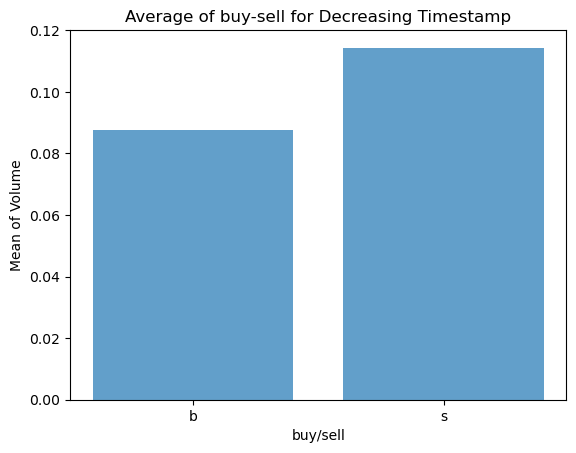

In [13]:
#Plot the graph of average values.


plt.figure(2)
plt.bar(["b","s"],[AveragesDecrease["b"],AveragesDecrease["s"]],alpha=0.7)
plt.xlabel("buy/sell")
plt.ylabel("Mean of Volume")
plt.title("Average of buy-sell for Decreasing Timestamp")
plt.show()


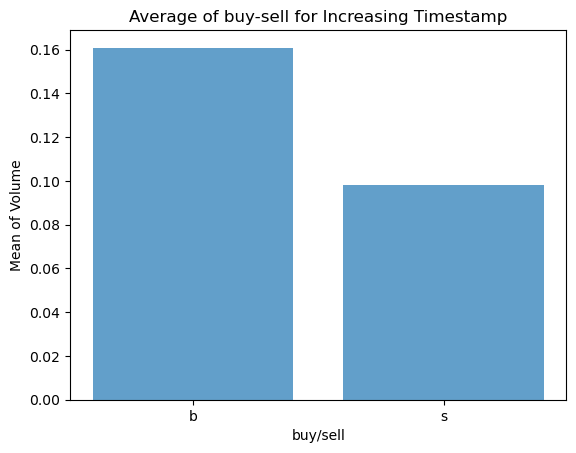

In [12]:
plt.figure(1)
plt.bar(["b","s"],[AveragesIncrease["b"],AveragesIncrease["s"]],alpha=0.7)
plt.xlabel("buy/sell")
plt.ylabel("Mean of Volume")
plt.title("Average of buy-sell for Increasing Timestamp")
plt.show()
